In [ ]:
#importing the required libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns
sns.set()

In [ ]:

df=pd.read_excel('/content/insurance.xlsx',sheet_name=0)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.notnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
expenses    1338
dtype: int64

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [ ]:
df1=df.drop_duplicates()
df1.duplicated().sum()

0

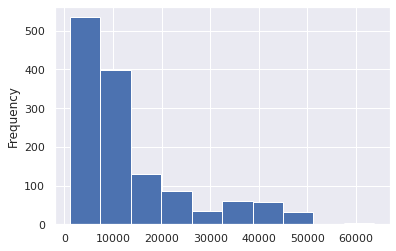

In [ ]:
df1.expenses.plot(kind='hist')

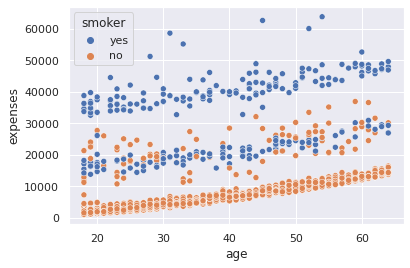

In [ ]:
sns.scatterplot(data=df1,x=df1['age'],y=df1['expenses'],hue=df1['smoker'])

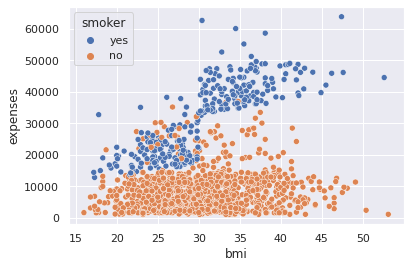

In [ ]:
sns.scatterplot(data=df1,x=df1['bmi'],y=df1['expenses'],hue=df1['smoker'])

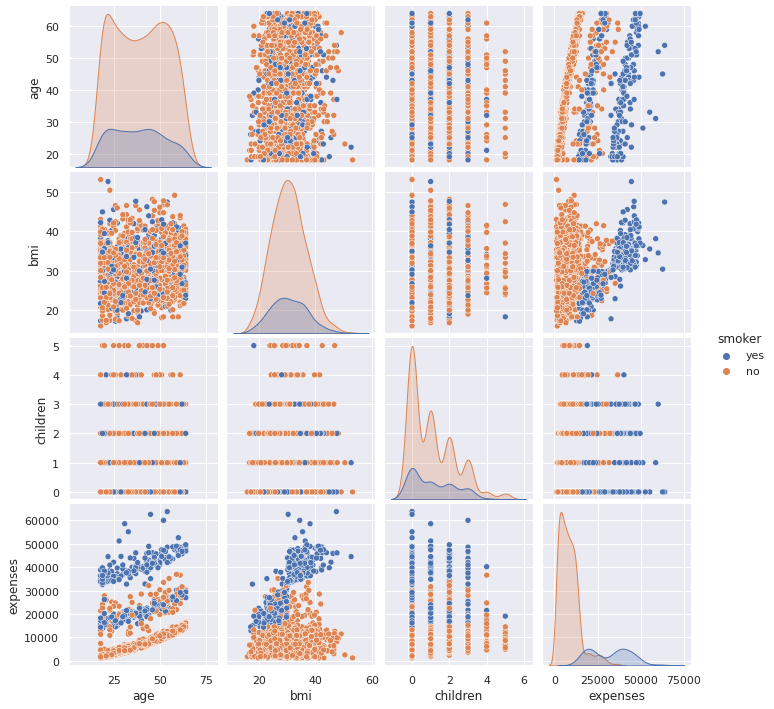

In [ ]:
sns.pairplot(data=df1,hue='smoker')

In [ ]:
df1['smoker']=df1['smoker'].map({'no':0,'yes':1})
df1['sex']=df1['sex'].map({'female':0,'male':1})
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [ ]:
one_hot = pd.get_dummies(df['region'])
one_hot

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [ ]:
final_df=pd.concat([df1,one_hot],axis=1)
final_df.head()

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19.0,0.0,27.9,0.0,1.0,southwest,16884.92,0,0,0,1
1,18.0,1.0,33.8,1.0,0.0,southeast,1725.55,0,0,1,0
2,28.0,1.0,33.0,3.0,0.0,southeast,4449.46,0,0,1,0
3,33.0,1.0,22.7,0.0,0.0,northwest,21984.47,0,1,0,0
4,32.0,1.0,28.9,0.0,0.0,northwest,3866.86,0,1,0,0


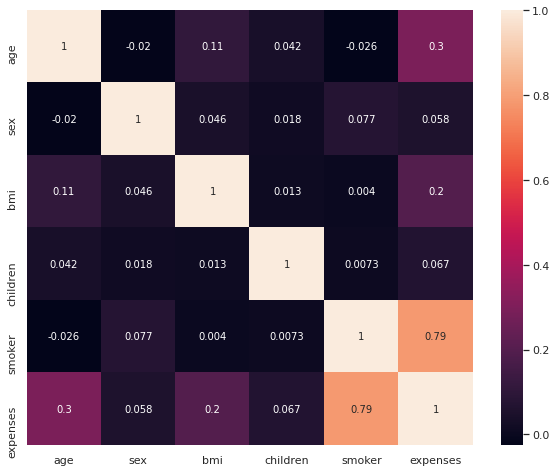

In [ ]:
plt.figure(figsize=(10,8))
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [ ]:
X=df1.drop(['expenses','region'],axis='columns')
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.9,0,1
1,18,1,33.8,1,0
2,28,1,33.0,3,0
3,33,1,22.7,0,0
4,32,1,28.9,0,0


In [ ]:
y=df1.expenses
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7437587645480631


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
test_score

0.7437700527356834